In [21]:
pip install -r ReqLibraries.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\Johin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import warnings


In [54]:
warnings.filterwarnings("ignore")
plt.style.use("seaborn-darkgrid")
%matplotlib inline

In [55]:
df = pd.read_csv("reliance_stock_price")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,540.427307,540.427307,506.127411,532.700500,482.812531,35372156
1,2010-01-05,569.551208,569.551208,527.697937,530.323059,480.657654,9872785
2,2010-01-06,534.879883,542.111328,530.298279,538.891846,488.423981,10933743
3,2010-01-07,538.891846,552.265076,533.938782,547.832092,496.526917,12090336
4,2010-01-08,548.797974,551.670715,542.854309,546.395691,495.225037,6973331
...,...,...,...,...,...,...,...
3268,2023-03-28,2245.000000,2256.500000,2237.000000,2248.000000,2248.000000,5804018
3269,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073
3270,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005
3271,2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238


In [56]:
df.index = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,540.427307,540.427307,506.127411,532.700500,482.812531,35372156
2010-01-05,2010-01-05,569.551208,569.551208,527.697937,530.323059,480.657654,9872785
2010-01-06,2010-01-06,534.879883,542.111328,530.298279,538.891846,488.423981,10933743
2010-01-07,2010-01-07,538.891846,552.265076,533.938782,547.832092,496.526917,12090336
2010-01-08,2010-01-08,548.797974,551.670715,542.854309,546.395691,495.225037,6973331
...,...,...,...,...,...,...,...
2023-03-28,2023-03-28,2245.000000,2256.500000,2237.000000,2248.000000,2248.000000,5804018
2023-03-29,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073
2023-03-31,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005


In [ ]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

x = df[['Open-Close', 'High-Low']]
x.head()

,Open-Close,High-Low
Date,,
2010-01-04,7.726807,34.299896
2010-01-05,39.228149,41.853271
2010-01-06,-4.011963,11.813049
2010-01-07,-8.940247,18.326294
2010-01-08,2.402283,8.816406


In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,0)
y

array([0, 1, 1, ..., 1, 0, 0])

In [59]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train Dataset
x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

In [60]:
# support Vector Classifier

cls = SVC().fit(x_train, y_train)

In [61]:
df['Predicted_signal'] = cls.predict(x)
df['Daily_Return'] = df.Close.pct_change()
df['Stratergy_Return'] = df.Daily_Return * df.Predicted_signal.shift(1)
df['Cum_Ret'] = df['Daily_Return'].cumsum()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_signal,Daily_Return,Stratergy_Return,Cum_Ret
Date,,,,,,,,,,,,,
2010-01-04,2010-01-04,540.427307,540.427307,506.127411,532.700500,482.812531,35372156,7.726807,34.299896,0,NaN,NaN,NaN
2010-01-05,2010-01-05,569.551208,569.551208,527.697937,530.323059,480.657654,9872785,39.228149,41.853271,0,-0.004463,-0.000000,-0.004463
2010-01-06,2010-01-06,534.879883,542.111328,530.298279,538.891846,488.423981,10933743,-4.011963,11.813049,0,0.016158,0.000000,0.011695
2010-01-07,2010-01-07,538.891846,552.265076,533.938782,547.832092,496.526917,12090336,-8.940247,18.326294,0,0.016590,0.000000,0.028285
2010-01-08,2010-01-08,548.797974,551.670715,542.854309,546.395691,495.225037,6973331,2.402283,8.816406,0,-0.002622,-0.000000,0.025663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,2023-03-28,2245.000000,2256.500000,2237.000000,2248.000000,2248.000000,5804018,-3.000000,19.500000,0,0.004670,0.004670,1.953284
2023-03-29,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073,4.300049,33.699951,0,-0.005916,-0.000000,1.947367
2023-03-31,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005,-76.050049,88.750000,1,0.043115,0.000000,1.990483


In [65]:
df['Cum_Stratergy'] = df['Stratergy_Return'].cumsum()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_signal,Daily_Return,Stratergy_Return,Cum_Ret,Cum_Straergy,Cum_Stratergy
Date,,,,,,,,,,,,,,,
2010-01-04,2010-01-04,540.427307,540.427307,506.127411,532.700500,482.812531,35372156,7.726807,34.299896,0,NaN,NaN,NaN,NaN,NaN
2010-01-05,2010-01-05,569.551208,569.551208,527.697937,530.323059,480.657654,9872785,39.228149,41.853271,0,-0.004463,-0.000000,-0.004463,0.000000,0.000000
2010-01-06,2010-01-06,534.879883,542.111328,530.298279,538.891846,488.423981,10933743,-4.011963,11.813049,0,0.016158,0.000000,0.011695,0.000000,0.000000
2010-01-07,2010-01-07,538.891846,552.265076,533.938782,547.832092,496.526917,12090336,-8.940247,18.326294,0,0.016590,0.000000,0.028285,0.000000,0.000000
2010-01-08,2010-01-08,548.797974,551.670715,542.854309,546.395691,495.225037,6973331,2.402283,8.816406,0,-0.002622,-0.000000,0.025663,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,2023-03-28,2245.000000,2256.500000,2237.000000,2248.000000,2248.000000,5804018,-3.000000,19.500000,0,0.004670,0.004670,1.953284,1.969236,1.969236
2023-03-29,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073,4.300049,33.699951,0,-0.005916,-0.000000,1.947367,1.969236,1.969236
2023-03-31,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005,-76.050049,88.750000,1,0.043115,0.000000,1.990483,1.969236,1.969236


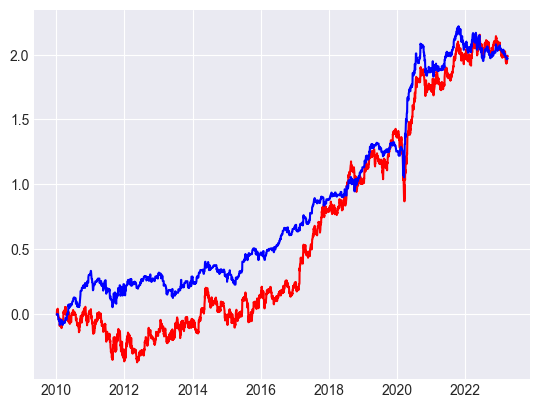

In [66]:
plt.plot(df['Cum_Ret'],color = 'Red')
plt.plot(df['Cum_Stratergy'], color = 'Blue')